### Реализуем код для выбора лучшей степени полиному:

* возьмем все степени от 1 до 10 по порядку, без пропусков.
* найдем степень полинома, где будет лучший r2-score
* напишим код, который выводит самую подходящую степень полинома и соответствующий ей скор


In [1]:
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import inv
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('3.10_non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [1]:
def generate_degrees(source_data: list, degree: int): # генерация степеней полинома
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

from sklearn.metrics import mean_squared_error

def train_polynomial(degree, data):    # обучаем модель с использованием степеней полиномов
    
    X = generate_degrees(data['x_train'], degree)

    model = LinearRegression().fit(X, data['y_train'])
    y_pred = model.predict(X)

    r2 = r2_score(data['y_train'], y_pred)
    print("Степень полинома %d r2 = %.8f" % (degree, r2))

    plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
    plt.plot(data['x_train'], y_pred)

Степень полинома 1 r2 = 0.519


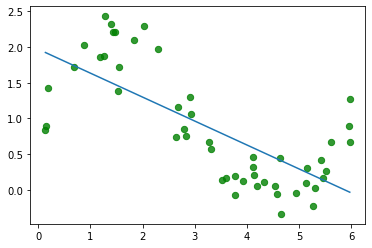

In [21]:
degree = 1

train_polynomial(degree, data)

Степень полинома 2 r2 = 0.533


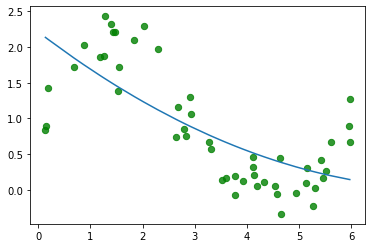

In [22]:
degree = 2

train_polynomial(degree, data)

Степень полинома 3 r2 = 0.888


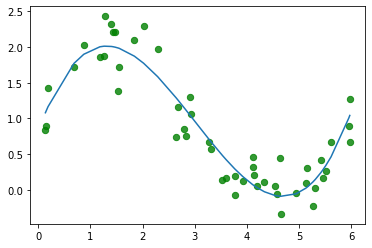

In [23]:
degree = 3

train_polynomial(degree, data)

Степень полинома 4 r2 = 0.895


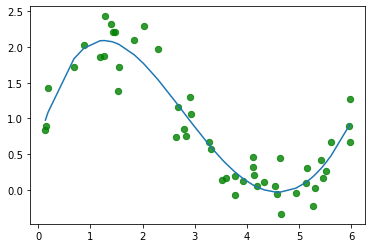

In [24]:
degree = 4

train_polynomial(degree, data)

Степень полинома 5 r2 = 0.896


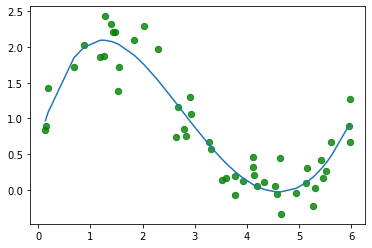

In [25]:
degree = 5

train_polynomial(degree, data)

Степень полинома 6 r2 = 0.899


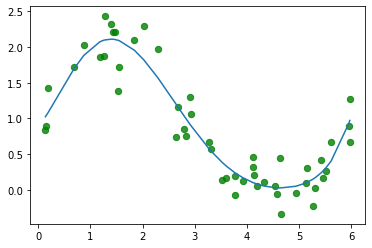

In [26]:
degree = 6

train_polynomial(degree, data)

Степень полинома 7 r2 = 0.900


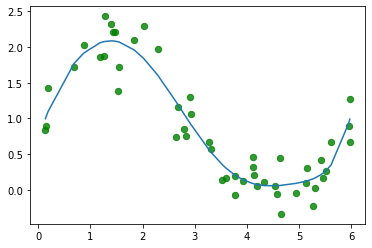

In [27]:
degree = 7

train_polynomial(degree, data)

Степень полинома 8 r2 = 0.90865562


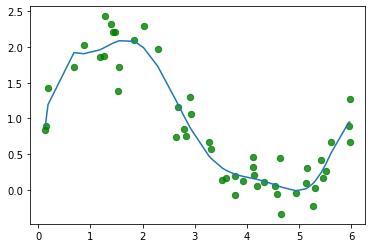

In [32]:
degree = 8

train_polynomial(degree, data)

Степень полинома 9 r2 = 0.90880712


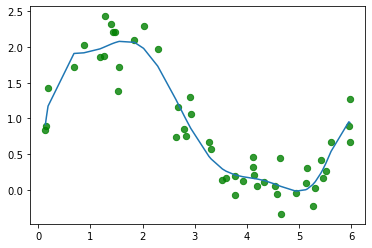

In [33]:
degree = 9

train_polynomial(degree, data)

Степень полинома 10 r2 = 0.90911338


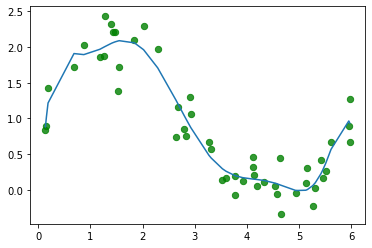

In [34]:
degree = 10

train_polynomial(degree, data)

In [5]:
X = generate_degrees(data['x_train'], 10)

model = LinearRegression().fit(X, data['y_train'])
y_pred = model.predict(X)
y_pred

array([ 0.88210063,  1.01897589,  1.21593631,  1.9077738 ,  1.89320055,
        1.96799152,  1.99510707,  2.00255707,  2.05113536,  2.05904856,
        2.07135511,  2.084889  ,  2.08789347,  2.05782442,  1.96152897,
        1.70752912,  1.2529592 ,  1.19221972,  1.03691945,  1.00291065,
        0.88643145,  0.87018973,  0.48418429,  0.44549175,  0.29608625,
        0.26126529,  0.20252313,  0.19922489,  0.17116341,  0.15216147,
        0.15216147,  0.15070419,  0.14577308,  0.13117677,  0.09362265,
        0.08594874,  0.07275973,  0.06757124, -0.00888369, -0.00456102,
        0.00499685,  0.05865993,  0.10034355,  0.22510034,  0.27123172,
        0.37545165,  0.56831675,  0.96442793,  0.93519213,  0.93519213])

## Напишим класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. 
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`



### 1 вариант

In [4]:
class CustomLinearReg:
   
    def __init__(self):
        self.w = None
                
    
    def fit(self, x, y):
        x = np.insert(X, 0, 1, axis=1)
        self.w = inv((x.T).dot(x)).dot(x.T).dot(y)
        return self      
            
        
    
    def predict(self,x):  
        model = self.w[0][0] + self.w[1][0]*x
        return model

In [6]:
reg = CustomLinearReg()

X= data.x_train.values.reshape(-1, 1)

y = data.y_train.values.reshape(-1, 1)

reg.fit(X,y)



y_pred = reg.predict(X)



print(r2_score(y_pred, y))

0.07495867693964553


### 2 вариант

In [5]:
class CustomLinearReg:    
    def __init__(self):

        self.w = None

    

    def fit(self, X, y):

        X = np.insert(X, 0, 1, axis=1)

        self.w = np.linalg.inv(

            X.T.dot(X)

        ).dot(

            X.T

        ).dot(

            y

        )



    def predict(self, X):

        Y_model = self.w[1][0]*X + self.w[0][0]

        return Y_model
    
reg = CustomLinearReg()

X= data.x_train.values.reshape(-1, 1)

y = data.y_train.values.reshape(-1, 1)

reg.fit(X,y)



y_pred = reg.predict(X)



print(r2_score(y_pred, y))

0.07495867693964553


## Возьмем дасет с домами Бостона

* разделим датасет с домами Бостона на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) 
* обучим модель на train датасете
* построим предсказания на valid датасете
* Посчитаем  `r2 score` на валидационном сете
* После этого применим z-преобразование и посмотрим как изменилась метрика r2.



In [21]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


In [22]:
data = load_boston()

In [23]:
features = data.data
y = data.target

In [24]:
x_train,x_valid,y_train,y_valid=train_test_split(features,y,test_size=0.2)


In [25]:
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_valid)
y_pred

array([31.33659488, 30.8669089 , 11.33538829, 17.05776557, 22.45459435,
        5.59740341, 11.33255402, 22.20011801, 32.62793324, 18.58656912,
       24.34377706, 20.22501229, 30.65230442, 32.24281367, 23.96628704,
       20.0372358 , 23.72467441, 26.16992297, 17.39619558, 14.50219686,
       15.89979565, 13.6826105 , 33.84755124, 20.43950932, -4.15462152,
       13.9585958 , 31.52181125, 17.1041301 , 16.6760042 , 20.16064654,
       22.66960703, 11.95641043, 14.99517298, 40.88343816, 25.03071616,
       19.8152003 , 16.87829088, 24.84177327, 23.00905033, 24.37595485,
       20.69383963, 15.93814418, 29.71944598, 18.33636025, 24.82789224,
       23.25987816, 30.53461296, 40.84944753, 24.7277729 , 20.17408325,
        8.50450626, 35.62757961, 25.28789951, 23.41367632, 17.80650667,
       30.76348434, 19.63599681, 21.64844406, 17.70507708, 24.87679627,
       16.45891398, 18.96513821, 25.28869348, 27.36200113, 23.95635279,
       19.82630113, 13.60452014,  8.32570329, 13.47464619, 33.27

In [26]:
r2_score(y_valid, y_pred)

0.6512474420253171

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
SS = StandardScaler()

In [29]:
trx_train = SS.fit_transform(x_train)

In [30]:
trx_valid = SS.transform(x_valid)

In [31]:
reg1 = LinearRegression().fit(trx_train, y_train)
y_pred1 = reg1.predict(trx_valid)
y_pred1

array([31.33659488, 30.8669089 , 11.33538829, 17.05776557, 22.45459435,
        5.59740341, 11.33255402, 22.20011801, 32.62793324, 18.58656912,
       24.34377706, 20.22501229, 30.65230442, 32.24281367, 23.96628704,
       20.0372358 , 23.72467441, 26.16992297, 17.39619558, 14.50219686,
       15.89979565, 13.6826105 , 33.84755124, 20.43950932, -4.15462152,
       13.9585958 , 31.52181125, 17.1041301 , 16.6760042 , 20.16064654,
       22.66960703, 11.95641043, 14.99517298, 40.88343816, 25.03071616,
       19.8152003 , 16.87829088, 24.84177327, 23.00905033, 24.37595485,
       20.69383963, 15.93814418, 29.71944598, 18.33636025, 24.82789224,
       23.25987816, 30.53461296, 40.84944753, 24.7277729 , 20.17408325,
        8.50450626, 35.62757961, 25.28789951, 23.41367632, 17.80650667,
       30.76348434, 19.63599681, 21.64844406, 17.70507708, 24.87679627,
       16.45891398, 18.96513821, 25.28869348, 27.36200113, 23.95635279,
       19.82630113, 13.60452014,  8.32570329, 13.47464619, 33.27

In [32]:
r2_score(y_valid, y_pred1)

0.6512474420253196

In [36]:
x_train

array([[1.42502e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.64310e+02, 7.39000e+00],
       [1.48660e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        3.94760e+02, 9.42000e+00],
       [1.71420e-01, 0.00000e+00, 6.91000e+00, ..., 1.79000e+01,
        3.96900e+02, 1.02100e+01],
       ...,
       [1.81590e-01, 0.00000e+00, 7.38000e+00, ..., 1.96000e+01,
        3.96900e+02, 6.87000e+00],
       [1.13290e-01, 3.00000e+01, 4.93000e+00, ..., 1.66000e+01,
        3.91250e+02, 1.13800e+01],
       [7.25800e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.90950e+02, 1.12800e+01]])